# Which neighborhood in Pittsburgh has the best food?

By: The Foodies (Ben Lannis, Mason Hoydick, and Dominic Galatis)

![farmers market](https://assets-varnish.triblive.com/2020/07/2816921_web1_ptr-liv-marketsquare-071420.jpg)

## Introduction

Food is an essential part of where you live. In particular, access to fresh, safe, and locally grown food is vital to individual and community health. Oftentimes, for instance, low income communities lack reasonable access to fresh produce and groceries for a variety of socioeconomic reasons. These neighborhood are known as "food deserts," so identifying the best and worst neighborhoods in terms of access to grocery stores/supermarkets will allow us to determine which places are doing things well and where the focus and attention of future policymaking ought to lie. At the same time, access to community-based food gardens provides great access to fresh, locally-grown produce. Finally, food safety violations give us important information about the quality of prepared-food options in a community.

## The Metric

For all of the reasons mentioned above, we've decided that the "best" neighborhood in Pittsburgh ought to be the one with the best food. Moreover, we believe that the submetrics of supermarket access, number of community "grow gardens", and number of food safety violations are three key indicators of overall food quality.

* Ben: Supermarket access (https://data.wprdc.org/dataset/allegheny-county-supermarkets-convenience-stores). This dataset includes location information about convenience stores and supermarkets in the city of Pittsburgh.
* Mason: Grow Pittsburgh Food Gardens (https://data.wprdc.org/dataset/grow-pittsburgh-food-gardens). This dataset includes location information about Grow Pittsburgh Food Gardens.
* Dom: Food safety violations (https://data.wprdc.org/dataset/allegheny-county-restaurant-food-facility-inspection-violations). This dataset includes location information about food safety violations by establishment location.

In the end, we'll synthesize the results of our individual analyses in order to name a single neighborhood that we believe has the best food in Pittsburgh.

## Submetric #1: Supermarket Density (by Ben Lannis)

Our overall metric for finding the "best" neighborhood in Pittsburgh is determining which neighborhood has the best food, so access to groceries plays an important role. Beyond just the number of grocery/convenience stores in a neighborhood (which can be affected by land area), I'll examine the density to determine which neighborhood's residents have the most accessible groceries near where they live.

### My Sub-metric: Density of convenience stores (food deserts)

![community mart](https://static.timesofisrael.com/jewishchronicle/uploads/2021/09/image_6487327-640x400.jpg)

### Goal of my analysis:
My sub-metric is density of grocery/convenience stores. Food deserts present a major challenge in low-income communities, so I want to know which neighborhoods are most/least affected by this phenomenon. Along the way, I'll determine which neighborhood has the most access to local groceries as well as which neighborhoods are overlooked (and the socioeconomic factors that explain why).

### My Dataset
Title: Allegheny County Supermarkets & Convenience Stores
Description: This dataset lists the name, address, coordinates, and type (either grocery or convenience store) of food locations in Allegheny County.

Link: https://data.wprdc.org/dataset/allegheny-county-supermarkets-convenience-stores

### Data Preview:

In [38]:
import pandas as pd

file_name = "data/conveniencesupermarket.csv"
data = pd.read_csv(file_name)
data.head()

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
0,201211150002,Avalon Fuel,Avalon Fuel Company,10/26/2012,901,Ohio River Blvd,PA,15202.0,40.495759,-80.066508,9.0,Convenience Store
1,201511040005,Ez Energy #303/7Eleven #36183H,Neelkanth Ansh Enterprises Inc,10/26/2015,209,Ohio River Blvd,PA,15143.0,40.545418,-80.194152,9.0,Convenience Store
2,201212130003,EZ Energy #311 / 7 Eleven #36191H,7 Eleven Inc,12/3/2012,8136,Ohio River Blvd,PA,15202.0,40.510522,-80.094268,9.0,Convenience Store
3,201211190006,Getgo #3646 / Crafton - Ingram,Giant Eagle Inc,11/15/2012,280,Crafton Ingram Shopping circle,PA,15205.0,41.203322,-77.194525,3.0,Convenience Store
4,53583,Mt NeBlvd Texaco,Mt NeBlvd Texaco,6/2/1995,1706,Mt Nebo Rd,PA,15143.0,40.553281,-80.109158,8.0,Convenience Store


### The Best Neighborhood (In terms of my sub-metric)

First, let's simply the above dataset to only include the columns we care about. Namely, we want our simplified dataset to include longitude, latitude, and category (since the specific names aren't as important).

In [39]:
# Gets certain columns for larger dataset
simpData = data[['Lat', 'Lon', 'Category']]
simpData.head(10)

,Lat,Lon,Category
0,40.495759,-80.066508,Convenience Store
1,40.545418,-80.194152,Convenience Store
2,40.510522,-80.094268,Convenience Store
3,41.203322,-77.194525,Convenience Store
4,40.553281,-80.109158,Convenience Store
5,40.367923,-79.780429,Convenience Store
6,40.494177,-80.267208,Convenience Store
7,40.370214,-79.913195,Convenience Store
8,40.440641,-80.149132,Convenience Store
9,40.529076,-80.025577,Convenience Store


Now we want to count the number of convenience/grocery stores in each neighborhood. To do so, we'll need to import the geometric data that describes neighborhood shape/location using geopandas:

In [40]:
import geopandas as gpd

# Imports neighborhood shape data
neighborhoods = gpd.read_file("data/Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.head(2)

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,7.843108e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,1.390463e+07,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."


Let's simplify this dataset so we're able to count the number of grocery/convenience stores in each neighborhood:

In [41]:
# Define new dataset for counting
numEach = pd.DataFrame(columns = ['Neighborhood', 'Shape', 'Area', 'ConvenienceCount', 'GroceryCount'])

numEach["Neighborhood"] = neighborhoods["hood"]
numEach["Shape"] = neighborhoods["geometry"]
numEach["Area"] = 0
numEach["ConvenienceCount"] = 0
numEach["GroceryCount"] = 0

for i, hood in numEach.iterrows():
    numEach.at[i, "Area"] = numEach.at[i, "Shape"].area * 100000

numEach.head()

,Neighborhood,Shape,Area,ConvenienceCount,GroceryCount
0,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",7.734486,0,0
1,North Oakland,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",13.714255,0,0
2,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",5.915794,0,0
3,Crawford-Roberts,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",7.104107,0,0
4,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",16.717981,0,0


Although the Shapley.area method doesn't return the area in a useful unit like m^2 or km^2, it still preserves the ratios between areas, so we multiply by a large constant to make the area values feel more natural.

We want to combine the information from our simpData (convenience/grocery store location info) and numEach (neighborhood name and geometric info) datsets. To do this, we'll use the ``Polygon.contains(Point)`` method since our geometric neighborhood data uses Polygon objects.

In [42]:
# Import the Point class so we can make use of Longitude and Latitude data from our simpData dataset:
from shapely.geometry import Point

for i, store in simpData.iterrows():
    # Store the longitude and latitude data in a Point Object
    pt = Point(store["Lon"], store["Lat"])
    
    # Now iterate through numEach dataset and increment counter accordingly
    for j, hood in numEach.iterrows():
        if hood["Shape"].contains(pt):
            if store["Category"] == "Convenience Store":
                numEach.at[j, 'ConvenienceCount'] = numEach.at[j, 'ConvenienceCount'] + 1
            elif store["Category"] == "Supermarket":
                numEach.at[j, 'GroceryCount'] = numEach.at[j, 'GroceryCount'] + 1
                
numEach.head()

,Neighborhood,Shape,Area,ConvenienceCount,GroceryCount
0,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",7.734486,5,1
1,North Oakland,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",13.714255,4,1
2,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",5.915794,1,0
3,Crawford-Roberts,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",7.104107,3,1
4,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",16.717981,5,4


All that's left is to divide the convenience/grocery store counts by the neighborhood area and do a final ordering in order to determine the neighborhood with the best density of each:

In [43]:
for i, neighborhood in numEach.iterrows():
    numEach.at[i, "ConvenienceCount"] = numEach.at[i, "ConvenienceCount"] / numEach.at[i, "Area"]
    numEach.at[i, "GroceryCount"] = numEach.at[i, "GroceryCount"] / numEach.at[i, "Area"]
    
numEach.columns = ['Neighborhood', 'Shape', 'Area', 'Convenience Density', 'Grocery Density']
    
numEach.head()

,Neighborhood,Shape,Area,Convenience Density,Grocery Density
0,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",7.734486,0.646455,0.129291
1,North Oakland,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",13.714255,0.291667,0.072917
2,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",5.915794,0.169039,0.000000
3,Crawford-Roberts,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",7.104107,0.422291,0.140764
4,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",16.717981,0.299079,0.239263


We want to separately consider the orderings of neighborhoods based on number of convenience stores and grocery stores respectively:

In [44]:
convenience_sorted = numEach.sort_values("Convenience Density", ascending=False)
grocery_sorted = numEach.sort_values("Grocery Density", ascending=False)

convenience_sorted.head()

,Neighborhood,Shape,Area,Convenience Density,Grocery Density
5,Central Business District,"POLYGON ((-79.99238 40.44484, -79.99233 40.444...",17.599559,0.965933,0.000000
0,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",7.734486,0.646455,0.129291
28,East Allegheny,"POLYGON ((-79.99488 40.45930, -79.99521 40.458...",6.490905,0.462185,0.154062
16,Bluff,"POLYGON ((-79.99390 40.43893, -79.99381 40.438...",9.000523,0.444419,0.000000
3,Crawford-Roberts,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",7.104107,0.422291,0.140764


Here is some simple visualization of the results using bar graphs:

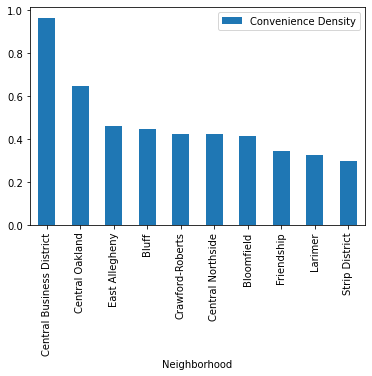

In [45]:
topConvenience = convenience_sorted[0:10]
topConvenience.plot.bar("Neighborhood", "Convenience Density")

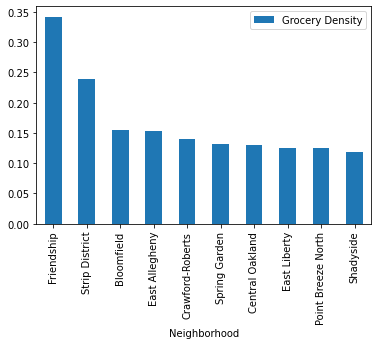

In [46]:
topGrocery = grocery_sorted[0:10]
topGrocery.plot.bar("Neighborhood", "Grocery Density")

Finally, let's use a different kind of visualization:

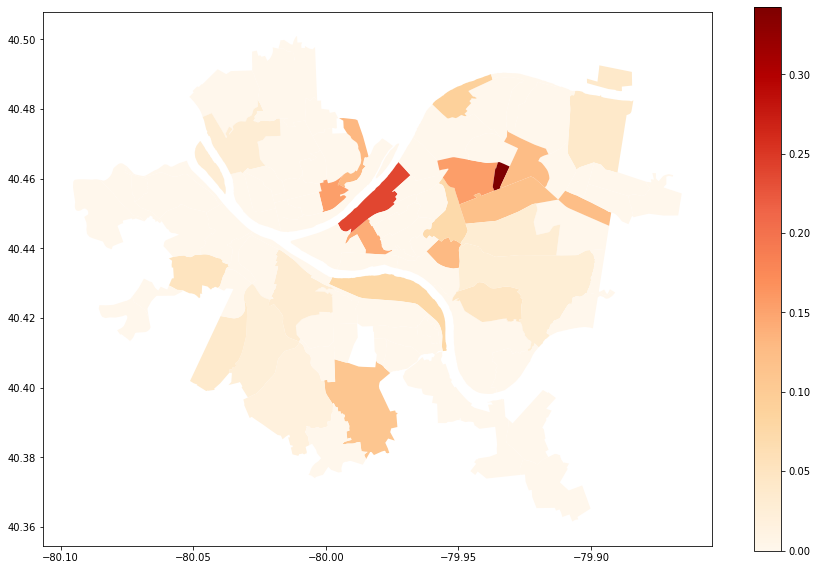

In [47]:
neighborhoods = gpd.read_file("data/Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods = neighborhoods[["hood", "geometry"]]

neighborhoods["Grocery Density"] = 0
for i, row in neighborhoods.iterrows():
    if neighborhoods.at[i, "hood"] == numEach.at[i, "Neighborhood"]:
        neighborhoods.at[i, "Grocery Density"] = numEach.at[i, "Grocery Density"]

neighborhoods.plot(column="Grocery Density", legend=True, figsize=(15, 10), cmap='OrRd')

### Submetric #1: Conclusion/Results
The above graph shows the results of my analysis. In particular, we're going to use grocery store/supermarket density (rather than convenience store density) in comparsion with our other sub-metrics in order to determine the best neighborhood in Pittsburgh. The reason for this decision is that supermarket density is most directly related to access to fresh food/produce whereas convenience store density doesn't carry the same significance. In fact, the neighborhoods that we might consider to be 'food deserts' may very well have a high convenience store density. What makes then food deserts is the lack of fresh food/produce within a reasonable distance, not a lack of convenience stores to buy scratch-off tickets.

### A brief detour

In addition to the neighborhood with the best access to fresh food, we also want to consider the neighborhoods with the least access:

In [48]:
grocery_sorted = numEach.sort_values("Grocery Density", ascending=True)
grocery_sorted.head(10)

,Neighborhood,Shape,Area,Convenience Density,Grocery Density
44,North Shore,"POLYGON ((-79.99508 40.45000, -79.99535 40.449...",8.348234,0.000000,0.0
62,Chateau,"POLYGON ((-80.02999 40.45909, -80.02989 40.458...",10.542279,0.094856,0.0
61,Polish Hill,"POLYGON ((-79.96779 40.46085, -79.96716 40.460...",7.001632,0.142824,0.0
60,Crafton Heights,"POLYGON ((-80.04222 40.44447, -80.04241 40.444...",20.641120,0.000000,0.0
59,Brighton Heights,"POLYGON ((-80.04078 40.49142, -80.03756 40.490...",30.736530,0.000000,0.0
58,Allegheny Center,"POLYGON ((-80.00149 40.45270, -80.00146 40.452...",5.752002,0.000000,0.0
57,Knoxville,"POLYGON ((-79.98806 40.41592, -79.98797 40.414...",8.290178,0.241249,0.0
55,Elliott,"POLYGON ((-80.02795 40.44463, -80.02806 40.444...",16.673954,0.059974,0.0
63,Arlington Heights,"POLYGON ((-79.96027 40.41810, -79.96023 40.418...",3.615556,0.000000,0.0
54,Allegheny West,"POLYGON ((-80.01457 40.45397, -80.01453 40.453...",3.884963,0.000000,0.0


Why are there so many neighborhoods with a grocery density of 0? Excluding the neighborhoods that are simply too small, we see neighborhoods like Brighton Heights with a massive area and not a single grocery store/supermarket. These neighborhoods are often referred to as 'food deserts' because they lack reasonable access to fresh produce and non-fast food options (The USDA uses a slightly different and more precise definition). Oftentimes, neighborhoods become food deserts due to low inocme levels, poverty, poor transportation, and other socioeconomic factors. A further area of research would be to look at other datasets that may help to explain the patterns found in my analysis of grocery/supermarket density.

## Submetric #2: Grow Pittsburgh Food Gardens (by Mason Hoydick)

We have decided that the neighborhood with the best food is the best neighborhood in Pittsburgh. I am going to determine how many grow gardens (community food gardens) are in each neighborhood, and use that data to determine what I believe to be the best neighborhood in Pittsburgh. 

### My Sub-metric: Grow gardens per neighborhood

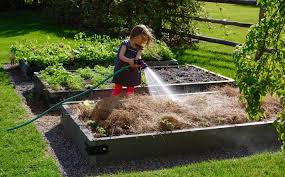

### Goal of my analysis 

My submetric is how many grow gardens are in each neighborhood. More gardens in a neighborhood correlates to a better Pittsburgh neighborhood. We will use the results of this analysis, along with the other two metrics, to determine which neighborhood in Pittsburgh has the best food overall.

### My Dataset

I will begin my exploration by loading in the dataset and viewing a few of the rows. 

In [49]:
import pandas as pd 
import geopandas as gpd

data = pd.read_csv('data/GrowGardenData.csv')
data.head(4)

,urban_grower,grower_id,category,url,street_address,city,state,zip_code,country,latitude,longitude
0,Angora Gardens,584,sustainability-fund-site|other,https://www.growpittsburgh.org/directory/garde...,3 Muse Lane,White Oak,Pennsylvania,15131.0,US,40.404686,-79.862095
1,Everybody's Garden,586,sustainability-fund-site|other,https://www.growpittsburgh.org/directory/garde...,301 West Elizabeth Street,Pittsburgh,Pennsylvania,15207.0,US,40.406546,-79.945442
2,EvGard Extension,587,other,https://www.growpittsburgh.org/directory/garde...,NaN,Pittsburgh,Pennsylvania,15201.0,US,40.406377,-79.945559
3,Glen Hazel Communiuty Garden,588,other,https://www.growpittsburgh.org/directory/garde...,Johnston Avenue at Roselle Drive,Pittsburgh,Pennsylvania,15207.0,US,40.406040,-79.931253


For each grow garden in Pittsburgh, this dataset contains it's name, a unique ID, the type of garden, it's city, state, zip code, country, latitude, and longitude. 

### The Best Neighborhood (According to my sub-metric)

I am going to start by dropping a couple of columns from the dataset which are not useful in determining which gardens are in which neighborhood, in order to tidy up the dataset. 

In [50]:
data1 = data.drop(columns=["category","url","state","country","urban_grower",
                           "grower_id","street_address","city","zip_code"])
data1.head(4)

,latitude,longitude
0,40.404686,-79.862095
1,40.406546,-79.945442
2,40.406377,-79.945559
3,40.406040,-79.931253


The columns I have removed are category, url, state, country, urban_grower, grower_id, street_address, city, and zip_code. The only two remaining columns are latitude and longitude, which are the only two necessary in figuring out which neighborhood each garden belongs to. 

Next, I am going to load in the data of Pittsburgh neighborhoods and determine how many gardens are in each neighborhood. 

In [51]:
neighborhood_data = gpd.read_file("data/Neighborhoods/Neighborhoods_.shp")
neighborhood_data.head(3)

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,7.843108e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,1.390463e+07,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,5.999801e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."


I am now going to tidy up this dataset, so it will be easier to view and determine how many grow gardens are in each neighborhood. I am going to simplify this geopandas dataset into a much simpler pandas dataset. 

In [52]:
mason_neighborhoods = pd.DataFrame(columns = ["Neighborhood", "Geometry", "Grow_Gardens"])
mason_neighborhoods["Neighborhood"] = neighborhood_data["hood"]
mason_neighborhoods["Geometry"] = neighborhood_data["geometry"]
mason_neighborhoods["Grow_Gardens"] = 0

mason_neighborhoods.head(3)

,Neighborhood,Geometry,Grow_Gardens
0,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",0
1,North Oakland,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",0
2,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",0


This dataset just contains each Pittsburgh neighborhood, alongside it's longitude and latitudes. It also has a column named "Grow_Gardens" which will be used to keep track of the number of grow gardens in each neighborhood. 

Now, I am going to iterate through the grow gardens data, and determine how many gardens are in each neighborhood, by updating the "Grow_Gardens" column in the dataset I have just created. 

In [53]:
# Importing the Point class in order to use longitude and latitude to determine what gardens are in what neighborhood 
from shapely.geometry import Point

for i, garden in data1.iterrows(): 
    # Begin by fixing each garden to a point 
    pt = Point(garden['longitude'],garden['latitude'])
    
    # Next, will itterate through the neighborhoods until we find the correct nieghborhood belonging to each garden 
    for j, neighborhood in mason_neighborhoods.iterrows(): 
        # When neighborhood contains the point of the garden, increment the garden variable and move onto the next garden 
        if neighborhood['Geometry'].contains(pt): 
            mason_neighborhoods.at[j, 'Grow_Gardens'] = neighborhood["Grow_Gardens"] + 1
            break
            
mason_neighborhoods.head(10)

,Neighborhood,Geometry,Grow_Gardens
0,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",0
1,North Oakland,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",1
2,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",3
3,Crawford-Roberts,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",1
4,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",0
5,Central Business District,"POLYGON ((-79.99238 40.44484, -79.99233 40.444...",0
6,Spring Hill-City View,"POLYGON ((-79.99761 40.47460, -79.99761 40.474...",0
7,Perry South,"POLYGON ((-80.01456 40.47727, -80.01462 40.477...",1
8,Summer Hill,"POLYGON ((-80.01087 40.50097, -80.01073 40.499...",0
9,Northview Heights,"POLYGON ((-80.00327 40.48271, -80.00326 40.482...",0


Next, I am going to sort the neighborhoods, from most grow gardens to least. 

In [54]:
sorted_neighborhoods = mason_neighborhoods.sort_values("Grow_Gardens", ascending=False)

sorted_neighborhoods.head(15)

,Neighborhood,Geometry,Grow_Gardens
33,Point Breeze,"POLYGON ((-79.89526 40.44717, -79.89517 40.447...",4
77,East Liberty,"POLYGON ((-79.91581 40.46088, -79.91580 40.460...",4
37,Garfield,"POLYGON ((-79.92961 40.46528, -79.92994 40.464...",4
2,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",3
18,Hazelwood,"POLYGON ((-79.95505 40.42713, -79.95498 40.427...",3
21,South Oakland,"POLYGON ((-79.95899 40.43665, -79.95887 40.436...",3
81,Middle Hill,"MULTIPOLYGON (((-79.97980 40.44761, -79.97979 ...",3
43,Larimer,"POLYGON ((-79.91243 40.45405, -79.91243 40.454...",3
12,Central Lawrenceville,"POLYGON ((-79.95393 40.47731, -79.95381 40.477...",3
24,Squirrel Hill South,"POLYGON ((-79.94475 40.44101, -79.94405 40.440...",2


After viewing the data, I learned that just 33 neighorhoods in Pittsburgh have at least 1 grow garden, so I am going to put those 33 on a plot. 

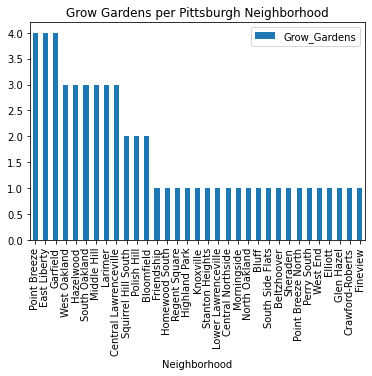

In [55]:
plot = sorted_neighborhoods.iloc[:33].plot(kind='bar', x="Neighborhood", y="Grow_Gardens",
                                           title="Grow Gardens per Pittsburgh Neighborhood")

### Results

From looking at the plot, Point Breeze, East Liberty, and Garfield are the only Pittsburgh neighborhoods with 4 grow gardens. 

Next are West Oakland, Hazelwood, South Oakland, Middle Hill, Larimer, and Central Lawrenceville, which all have 3 grow gardens. 

Squirrel Hill South, Polish Hill, and Bloomfield all have two grow gardens, and then there are a number of Pittsburgh neighborhoods that only have one garden contained in their neighborhood. 

### Submetric #2: Conclusion/Results

To summarize, the best neighborhood under my submetric would be Point Breeze, East Liberty, or Garfield. In order to use my analysis along with the other two submetrics, we will assign each neighborhood a "rank" according to which "tier" they belong to. For instance, Point Breeze, East Libery, and Garfield would all be assigned rank 1 while West Oakland, Hazelwood, etc. would get rank 2. This will allow us to take a sum across all of the rankings that our individual analyses produce and definitively find a single neighborhood that is the "best."

## Submetric #3: Food Safety Violations (by Dominic Galatis)

Our group has chosen the metric of which neighborhood produces the "best" food in Pittsburgh. Along with access to fresh, locally-grown food, the cleanlieness of prepared food options plays an important role. I will examine trends of restaurants not passing inspection, and look for patterns that indicate the best neighborhoods in terms of prepared food safety/quality.

### My Submetric: Restaurant/Food Facility Inspections and Locations

![inspection](https://media.giphy.com/media/xULW8xwbxgeSN9X2ww/giphy.gif))

### Goal of my Analysis:

My sub-metric is Restaurant/Food Facility Inspections and Locations. Passing inspections is important in order to keep restraunts open and running while serving the best quality food. I want to find trends in certain areas passing/not passing inspections. At the end, I will find which neighborhood has the best cleanliness in this important food setting.

### Data Preview:

In [56]:
import pandas as pd

data = pd.read_csv('data/alco-restuarant-violations.csv')
data.head()

,encounter,id,placard_st,facility_name,bus_st_date,description,description_new,num,street,city,...,zip,inspect_dt,start_time,end_time,municipal,rating,low,medium,high,url
0,201401020031,201005070003,1,Vocelli Pizza,2010-04-28,Chain Restaurant without Liquor,Toxic Items,1019,Mt Royal Boulevard,Pittsburgh,...,15223.0,2014-01-02,12:00:00,12:30:00,Shaler,V,F,F,F,http://appsrv.alleghenycounty.us/reports/rwser...
1,201401020031,201005070003,1,Vocelli Pizza,2010-04-28,Chain Restaurant without Liquor,Certified Food Protection Manager,1019,Mt Royal Boulevard,Pittsburgh,...,15223.0,2014-01-02,12:00:00,12:30:00,Shaler,V,F,F,F,http://appsrv.alleghenycounty.us/reports/rwser...
2,201401020032,200307030002,1,The Groove Cheesesteak Co aka Southside Steaks,2003-06-20,Restaurant without Liquor,Probe-Type Thermometers,2000,E Carson Street,Pittsburgh,...,15203.0,2014-01-02,11:30:00,12:45:00,Pittsburgh-117,V,F,F,F,http://appsrv.alleghenycounty.us/reports/rwser...
3,201401020032,200307030002,1,The Groove Cheesesteak Co aka Southside Steaks,2003-06-20,Restaurant without Liquor,Employee Personal Hygiene,2000,E Carson Street,Pittsburgh,...,15203.0,2014-01-02,11:30:00,12:45:00,Pittsburgh-117,V,F,F,F,http://appsrv.alleghenycounty.us/reports/rwser...
4,201401020032,200307030002,1,The Groove Cheesesteak Co aka Southside Steaks,2003-06-20,Restaurant without Liquor,Handwashing Facilities,2000,E Carson Street,Pittsburgh,...,15203.0,2014-01-02,11:30:00,12:45:00,Pittsburgh-117,V,F,F,F,http://appsrv.alleghenycounty.us/reports/rwser...


### The Best Neighborhood (According to my Sub-Metric)

First, lets begin by simplifying the data down to only the columns we care about. We only want our data sets to include facility name, city, rating, low, medium, and high.

In [57]:
import pandas as pd
import math

data = pd.read_csv('data/alco-restuarant-violations.csv')
newdata = data[['facility_name','city', 'rating', 'high', 'medium', 'low', "zip"]]

#for i, report in newdata.iterrows():
    #if(not math.isnan(newdata.at[i, "zip"])):
        #newdata.at[i, "zip"] = int(newdata.at[i, "zip"])
        
newdata.head(10)

,facility_name,city,rating,high,medium,low,zip
0,Vocelli Pizza,Pittsburgh,V,F,F,F,15223.0
1,Vocelli Pizza,Pittsburgh,V,F,F,F,15223.0
2,The Groove Cheesesteak Co aka Southside Steaks,Pittsburgh,V,F,F,F,15203.0
3,The Groove Cheesesteak Co aka Southside Steaks,Pittsburgh,V,F,F,F,15203.0
4,The Groove Cheesesteak Co aka Southside Steaks,Pittsburgh,V,F,F,F,15203.0
5,The Groove Cheesesteak Co aka Southside Steaks,Pittsburgh,V,F,F,F,15203.0
6,The Groove Cheesesteak Co aka Southside Steaks,Pittsburgh,V,F,F,F,15203.0
7,Station Street Food,Pittsburgh,V,F,F,F,15206.0
8,Co Go's #346,Homestead,V,F,F,F,15120.0
9,Co Go's #346,Homestead,V,NaN,NaN,NaN,15120.0


Next, we will split all the restraunts into 2 seperate groups, regarding their rating. Group V does not pass inspection and has a violation, meanwhile Group N passes inspection with no violations.

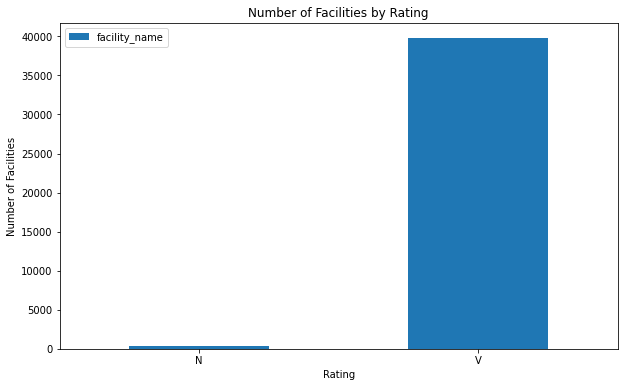

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/alco-restuarant-violations.csv')
newdata2 = data[['facility_name', 'rating']]

# Group the data by rating and count the number of facilities in each rating category
rating_counts = newdata2.groupby('rating').count()

# Create a bar chart
ax = rating_counts.plot(kind='bar', figsize=(10, 6), rot=0)

# Set the chart title and axis labels
ax.set_title('Number of Facilities by Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Facilities')

# Show the chart
plt.show()

Now we want to count the number of restraunts in each neighborhood that have a violation. In order to do this we must import the geoemtric data using geopandas to find the neighborhood locations.

In [60]:
import pandas as pd
import geopandas as gdp
import requests
from io import StringIO
import matplotlib.pyplot as plt

neighborhoods_url = 'https://data.wprdc.org/datastore/dump/668d7238-cfd2-492e-b397-51a6e74182ff'

response_neighborhoods = requests.get(neighborhoods_url)
csv_data_neighborhoods = StringIO(response_neighborhoods.text)

df_neighborhoods = pd.read_csv(csv_data_neighborhoods)

url_neighborhood_boundaries = 'https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/4af8e160-57e9-4ebf-a501-76ca1b42fc99/download/pittsburghpaneighborhoods-.geojson'
gdf_neighborhood_boundaries = gdp.read_file(url_neighborhood_boundaries)
gdf_neighborhood_boundaries["Violations"] = 0
gdf_neighborhood_boundaries["zip_code"] = None

main_dataset = gdf_neighborhood_boundaries[["hood", "geometry", "Violations", "zip_code"]]
zip_boundaries = gdp.read_file("data/Allegheny_County_Zip_Code_Boundaries.geojson")

zip_boundaries.head(10)

for i, thing in zip_boundaries.iterrows():
    for j, otherthing in main_dataset.iterrows():
        if thing["geometry"].intersects(otherthing["geometry"]):
            main_dataset.at[j, "zip_code"] = zip_boundaries.at[i, "ZIP"]

temp_data = newdata[newdata["rating"] == "V"]

#here we want to iterate through violation data (newdata) and increment Violation counter in main_dataset

test = temp_data.value_counts("zip")
for zip_index, count in test.items():
    for q, hood in main_dataset.iterrows():
        if zip_index == float(main_dataset.at[q, "zip_code"]):
            main_dataset.at[q, "Violations"] = count


Now that we have the data in our main dataframe, let's plot it to gain a visual understanding:

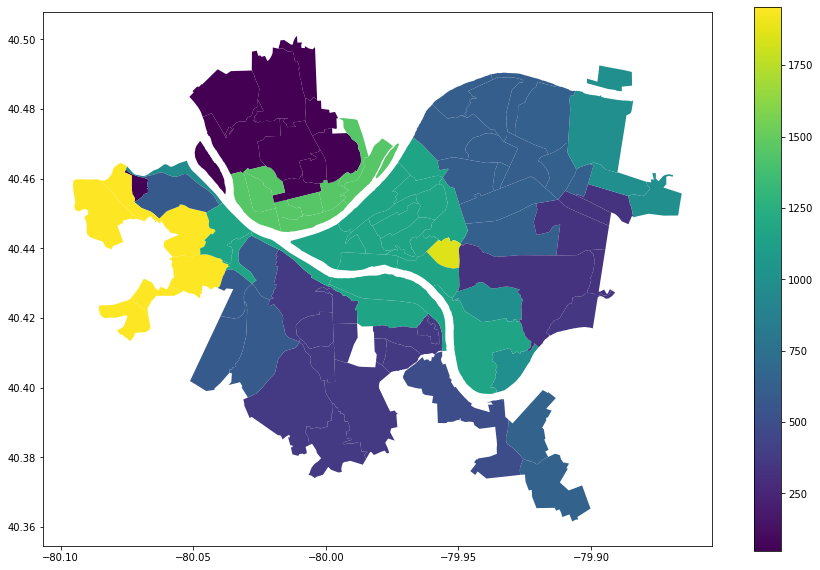

In [61]:
main_dataset.plot(column="Violations", legend=True, figsize=(15, 10))

Finally, let's put the data in order to see which areas have the most violations:

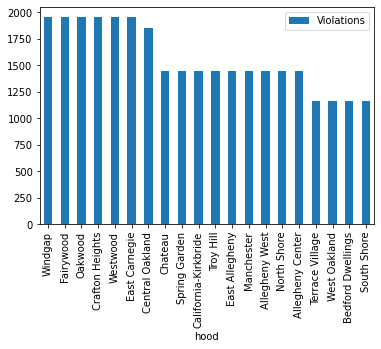

In [62]:
worst = main_dataset.sort_values("Violations", ascending=False)
worst = worst[["hood", "Violations"]]
worst = worst[0:20]
worst.plot.bar("hood", "Violations")

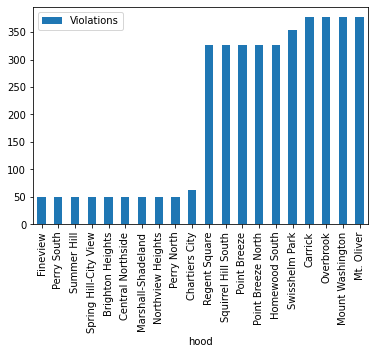

In [63]:
best = main_dataset.sort_values("Violations", ascending=True)
best = best[["hood", "Violations"]]
best = best[0:20]
best.plot.bar("hood", "Violations")

### Submetric #3: Conclusion/Results

Based on the above graphs, we see that neighborhoods like Windgap, Fairywood, Oakwood, Crafton Heights, Westwood, and East Carnegie all have the most food safety violations. It is important to note that this data is relative to the number of restaurants in each area/zip-code, so it is possible that some zip-codes simply have more restaurants than others. Nonetheless, the data presented here shows that these neighborhoods have the least food-safe prepared food dining options.

On the other hand, neighborhoods like Fineview, Perry South, Summer Hill, etc. belong to the area with the least food safety violations.

## Meta-Analysis

In [70]:
import geopandas as gpd
final_neighborhoods = gpd.read_file("data/Neighborhoods/Neighborhoods_.shp") # read in the shapefile
    
final_neighborhoods = final_neighborhoods[["hood", "geometry"]]
final_neighborhoods["Grocery Density"] = 0
final_neighborhoods["Grow_Gardens"] = 0
final_neighborhoods["Violations"] = 0

for i, hood in final_neighborhoods.iterrows():
    final_neighborhoods.at[i, "Grocery Density"] = numEach.at[i, "Grocery Density"]
    final_neighborhoods.at[i, "Grow_Gardens"] = mason_neighborhoods.at[i, "Grow_Gardens"]
    
for j, area in main_dataset.iterrows():
    for k, place in final_neighborhoods.iterrows():
        if main_dataset.at[j, "hood"] == final_neighborhoods.at[k, "hood"]:
            final_neighborhoods.at[k, "Violations"] = main_dataset.at[j, "Violations"]
    
final_neighborhoods.head()

,hood,geometry,Grocery Density,Grow_Gardens,Violations
0,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",0.129291,0,1853
1,North Oakland,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",0.072917,1,1161
2,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",0.000000,3,1161
3,Crawford-Roberts,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",0.140764,1,1161
4,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",0.239263,0,1161


Now that we have all of the data in one place, how do we determine the winner? We decided to use the following formula to assign each neighborhood a "score" based on weighted performance in each metric:

In [71]:
final_neighborhoods["score"] = 0

# we don't have violation data for all of the neighborhoods so we unfortunately have to restrict our final analysis a bit
#final_neighborhoods = final_neighborhoods[final_neighborhoods["Violations"] > 0]

for i, hood in final_neighborhoods.iterrows():
    final_neighborhoods.at[i, "score"] = (100 * final_neighborhoods.at[i, "Grocery Density"]) + (10 * final_neighborhoods.at[i, "Grow_Gardens"]) - (10 * (final_neighborhoods.at[i, "Violations"] / 1000))
    
final_neighborhoods.sort_values("score", ascending=False)

,hood,geometry,Grocery Density,Grow_Gardens,Violations,score
77,East Liberty,"POLYGON ((-79.91581 40.46088, -79.91580 40.460...",0.125125,4,608,46.432499
48,Friendship,"POLYGON ((-79.93095 40.46304, -79.93098 40.462...",0.342413,1,624,38.001252
33,Point Breeze,"POLYGON ((-79.89526 40.44717, -79.89517 40.447...",0.000000,4,327,36.730000
37,Garfield,"POLYGON ((-79.92961 40.46528, -79.92994 40.464...",0.000000,4,608,33.920000
31,Bloomfield,"POLYGON ((-79.93939 40.46454, -79.93933 40.464...",0.155364,2,608,29.456431
...,...,...,...,...,...,...
78,East Carnegie,"POLYGON ((-80.07255 40.42533, -80.07245 40.424...",0.000000,0,1954,-19.540000
83,Fairywood,"POLYGON ((-80.08804 40.45975, -80.08803 40.459...",0.000000,0,1954,-19.540000
47,Windgap,"POLYGON ((-80.07321 40.45993, -80.07320 40.459...",0.000000,0,1954,-19.540000
60,Crafton Heights,"POLYGON ((-80.04222 40.44447, -80.04241 40.444...",0.000000,0,1954,-19.540000


In other words, a neighborhoods "score" is equal to 100 times its grocery store density plus 10 times the number of grow gardens it has minus 10 times the number of violations it has over 20. We chose this score mechanism for a few reasons. First, it causes upsets and doesn't let grocery density dominate the conversation. For example, Point Breeze has a high score (despite not having any recorded grocery stores) because it has so many grow gardens. Moreover, dividing the number of violations by 1000 allows a neighborhood's violations to "balance out" the advantage it gains from having a lot of grow gardens.

### The Winner is East Liberty!!!

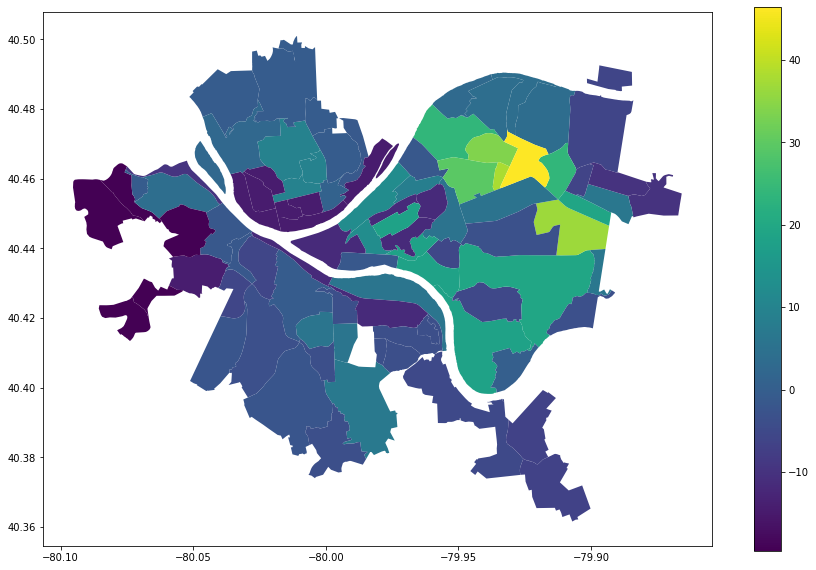

In [76]:
final_neighborhoods.plot(column="score", figsize=(15, 10), legend=True)

## Final Conclusion/Thoughts

**Ben:**

**Mason:**

**Dom:**